# Initialization
Import modules and define useful plotting functions

In [1]:
%matplotlib notebook 
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from scipy import integrate
import glob,sys

from mpl_toolkits.basemap import Basemap, shiftgrid

import MV2 as MV
import cdms2 as cdms
import genutil
import cdutil
import cdtime

sys.path.append("/Users/kmarvel/Google Drive/python-utils")
import Plotting


def bmap(X,projection="moll",**kwargs):
    """ quick plot of data on a lat,lon grid """
   # lon = X.getLongitude()[:]
    #lat = X.getLatitude()[:]
    
    lon = X.getLongitude().getBounds()[:,0]
    lat = X.getLatitude().getBounds()[:,0]
    vmin=None
    vmax=None
    if "vmin" in kwargs.keys():
        vmin=kwargs.pop("vmin")
    if "vmax" in kwargs.keys():
        vmax=kwargs.pop("vmax")
    if not ("lon_0" in list(kwargs.keys())):
        lon_0=np.median(lon)
    else:
        lon_0=kwargs.pop("lon_0")
        X,lon = shiftgrid(180,X,lon,start=False)
    m = Basemap(lon_0=lon_0,projection=projection,**kwargs)
    
        
    x,y=m(*np.meshgrid(lon,lat))
    #if vmin is None:
    #m.pcolormesh(x,y,X,**kwargs)
    #else:
    m.pcolor(x,y,X,vmin=vmin,vmax=vmax)
    return m

surface = {"hfls": "Surface Upward Latent Heat Flux",\
            "hfss": "Surface Upward Sensible Heat Flux",\
            "rlds":"Surface Downwelling Longwave Radiation",\
            "rlus":"Surface Upwelling Longwave Radiation",\
            "rsds":"Surface Downwelling Shortwave Radiation",\
            "rsus": "Surface Upwelling Shortwave Radiation"}
TOA = {"rsdt":"TOA Incident Shortwave Radiation",\
       "rsut": "TOA Outgoing Shortwave Radiation",\
       "rlut": "TOA Outgoing Longwave Radiation"}

# Data entry from RFMIP LGM experiments

In [2]:
model="IPSL-CM6A-LR"
model_lgm_id="ipsl-glac1d"
datadirec="/Users/kmarvel/Documents/DATA/LGM/LGM-Adjustments/"+model_lgm_id+"/"
#datadirec="/Users/kmarvel/Documents/DATA/LGM/LGM-Adjustments/ipsl-ice6g/"

## Top-of-atmosphere variables

f=cdms.open(glob.glob(datadirec+"rsdt_*")[0])

rsdt=f("rsdt")

f.close()

f=cdms.open(glob.glob(datadirec+"rsut_*")[0])

rsut=f("rsut")

f.close()

f=cdms.open(glob.glob(datadirec+"rlut_*")[0])

rlut=f("rlut")

f.close()

TOA = rsdt-(rsut+rlut)

print("TOA imbalance is ", MV.average(cdutil.averager(TOA,axis='xy')))

f=cdms.open(glob.glob(datadirec+"ts_*")[0])

ts=f("ts")

f.close()

## Clear-sky fluxes

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


TOA imbalance is  -2.9278632608819906


## Clear-sky fluxes

In [3]:
#f=cdms.open(glob.glob(datadirec+"rsdtcs_*")[0])

#rsdtcs=f("rsdtcs")

#f.close()

f=cdms.open(glob.glob(datadirec+"rsutcs_*")[0])

rsutcs=f("rsutcs")

f.close()

f=cdms.open(glob.glob(datadirec+"rlutcs_*")[0])

rlutcs=f("rlutcs")

f.close()



In [4]:
SWCRE = rsutcs-rsut
LWCRE = rlutcs-rlut

## Cloud cover

In [5]:
f=cdms.open(glob.glob(datadirec+"clt_*")[0])

clt=f("clt")

f.close()

f=cdms.open(glob.glob(datadirec+"clcalipso_*")[0])

clcalipso=f("clcalipso")
#clisccp=f("clisccp")

f.close()

Sanity check: does the cloud cover look ok?

In [6]:
plt.set_cmap(cm.magma)
plt.figure()
m=bmap(MV.average(clt,axis=0),projection="cyl")
m.drawcoastlines()
cbar=plt.colorbar(orientation="horizontal",label="Cloud Cover (%)")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [7]:
plt.set_cmap(cm.coolwarm)
plt.figure()
m=bmap(MV.average(SWCRE,axis=0),projection="cyl",vmin=-10,vmax=10)
plt.title("LGM SWCRE")
m.drawcoastlines()
cbar=plt.colorbar()

<IPython.core.display.Javascript object>

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [8]:
plt.figure()
plt.set_cmap(cm.coolwarm)
plt.title("LGM TOA imbalance")
m=Plotting.bmap(MV.average(TOA,axis=0),projection="cyl")
m.drawcoastlines()
cbar=plt.colorbar(orientation='horizontal',label="TOA imbalance (W/m2)")


<IPython.core.display.Javascript object>

/Users/kmarvel/Google Drive/python-utils/Plotting.py:79: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(lon_0=lon_0,projection=projection,**kwargs)


## Preindustrial control data

In [9]:
model="IPSL-CM6A-LR"
pidirec="/Users/kmarvel/Documents/DATA/LGM/ProcessedFromMary/"+model+"/piControl/TimeMeans/"
histdirec="/Users/kmarvel/Documents/DATA/LGM/ProcessedFromMary/"+model+"/historical/TimeMeans/"
#Kludge: use rsdt from historical since it's not available for piControl.  
#rsdt_mean=MV.average(rsdt,axis=0)
frsdt= cdms.open(histdirec+"rsdt_timemean.nc")
rsdt_pi=frsdt("rsdt")
if model=="CESM2":
    rsdt_pi=rsdt_pi.regrid(rsdt.getGrid(),regridTool='regrid2')
frsdt.close()
frsut=cdms.open(pidirec+"rsut_timemean.nc")
rsut_pi=frsut("rsut")
frsut.close()
frlut=cdms.open(pidirec+"rlut_timemean.nc")
rlut_pi=frlut("rlut")
frlut.close()

frsutcs=cdms.open(pidirec+"rsutcs_timemean.nc")
rsutcs_pi=frsutcs("rsutcs")
frsutcs.close()

frlutcs=cdms.open(pidirec+"rlutcs_timemean.nc")
rlutcs_pi=frlutcs("rlutcs")
frlutcs.close()

fts=cdms.open(pidirec+"ts_timemean.nc")
ts_pi=fts("ts")
fts.close()

In [10]:
TOA_LGM=MV.average(TOA,axis=0)
TOA_pi = rsdt_pi-(rsut_pi+rlut_pi)

## TOA imbalance in the pre-industrial runs (why is it nonzero?)

In [11]:
print("TOA imbalance is", float(cdutil.averager(TOA_pi,axis='xy')), "Wm-2")

TOA imbalance is 0.6839974269198607 Wm-2


## Flux differences and cloud radiative effects
Huge reductions over the ice sheets, as expected.  

In [12]:
plt.figure()
plt.set_cmap(cm.coolwarm)
m=bmap(MV.average(TOA,axis=0)-TOA_pi,projection="cyl",vmin=-20,vmax=20,lon_0=0)
plt.colorbar(orientation="horizontal",label=r"TOA flux difference (Wm$^{-2})$")
plt.title("IPSL-6A-LR")
m.drawcoastlines()
plt.savefig("IPSL_TOA_flux.png")

<IPython.core.display.Javascript object>

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [13]:
print("IPSL TOA flux difference is ",cdutil.averager(MV.average(TOA,axis=0)-TOA_pi,axis='xy'))

IPSL TOA flux difference is  -3.6118607449965268


In [14]:
SWCRE_LGM=MV.average(SWCRE,axis=0)
SWCRE_piC=rsutcs_pi-rsut_pi
plt.figure()
m=bmap(-1*(SWCRE_LGM-SWCRE_piC),projection="moll",vmin=-40,vmax=40,lon_0=0)
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"W m$^{-2}$")
plt.title(r'$\Delta$SWCRE')

<IPython.core.display.Javascript object>

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


Text(0.5, 1.0, '$\\Delta$SWCRE')

In [15]:
LWCRE_LGM=MV.average(LWCRE,axis=0)
LWCRE_piC=rlutcs_pi-rlut_pi
plt.figure()
m=bmap(-1*(LWCRE_LGM-LWCRE_piC),projection="cyl",vmin=-20,vmax=20)
m.drawcoastlines()
cbar=plt.colorbar(orientation="horizontal",label=r"W m$^{-2}$")
title=plt.title(r'$\Delta$LWCRE')

<IPython.core.display.Javascript object>

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [16]:
print("LGM SWCRE is ",cdutil.averager(SWCRE_LGM,axis='xy'))
print("piC SWCRE is ", cdutil.averager(SWCRE_piC,axis='xy'))
print("DIFF is", cdutil.averager(SWCRE_LGM,axis='xy')-cdutil.averager(SWCRE_piC,axis='xy'))

LGM SWCRE is  -47.4881303668387
piC SWCRE is  -49.24807478976397
DIFF is 1.7599444229252654


In [17]:
print("LGM LWCRE is ",cdutil.averager(LWCRE_LGM,axis='xy'))
print("piC LWCRE is ", cdutil.averager(LWCRE_piC,axis='xy'))
print("DIFF is", cdutil.averager(LWCRE_LGM,axis='xy')-cdutil.averager(LWCRE_piC,axis='xy'))

LGM LWCRE is  25.655425545288683
piC LWCRE is  25.90206852747305
DIFF is -0.24664298218436898


In [18]:
ts_LGM=MV.average(ts,axis=0)
dTs=ts_LGM-ts_pi
plt.figure()
bmap(dTs,projection='cyl',vmin=-5,vmax=5)
plt.colorbar()

<IPython.core.display.Javascript object>

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [19]:
print("Land cooling is",float(cdutil.averager(dTs,axis='xy')),"K")

Land cooling is -1.642240165768314 K


In [20]:
ERF_LGM = TOA_LGM-TOA_pi+dTs/0.75
plt.figure()
m=bmap(ERF_LGM,projection="cyl",lon_0=0,vmin=-30,vmax=30)
cbar=plt.colorbar(orientation="horizontal",label=r"W m$^{-2}$")
title=plt.title("LGM ERF")

<IPython.core.display.Javascript object>

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/numpy/ma/core.py:3201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [21]:
print("ERF of the LGM is",cdutil.averager(ERF_LGM,axis='xy'),"Wm-2")

ERF of the LGM is -5.801514299354277 Wm-2


Cooling in IPSL_CM5 (from ftp://oceane.obs-vlfr.fr/pub/lguidi/PRIME/Pubs/kageyama%202012%20part%201.pdf): -4.48K so, assuming unit efficacy of ice sheet forcing we have (need to check 2xCO2 forcing in IPSL):

In [22]:
ECS_LGM=3.7*-4.48/cdutil.averager(ERF_LGM,axis='xy')

In [23]:
print()

In [24]:
f=cdms.open("/Users/kmarvel/Documents/DATA/LGM/kernels/HadGEM3-GA7.1_TOA_kernel.nc")

tsurf_kernel=f("tsurf_lw")
regridded=MV.zeros((12,)+ERF_LGM.getGrid().shape)
for i in range(12):
    regridded[i]=tsurf_kernel[i].regrid(ERF_LGM.getGrid(),regridTool='regrid2')
regridded.setAxis(0,tsurf_kernel.getAxis(0))
regridded.setAxis(1,ERF_LGM.getGrid().getAxis(0))
regridded.setAxis(2,ERF_LGM.getGrid().getAxis(1))
f.close()

Kernel values are negative, indicating that an increase in temperature decreases the net incoming radiation (i.e., increases the outgoing longwave radiation)

In [26]:
plt.figure()
m=bmap(tsurf_kernel[0],projection='cyl',vmin=-1,vmax=1)
m.drawcoastlines()
plt.colorbar()

<IPython.core.display.Javascript object>

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [27]:
tsurf_kernel.units
cdutil.averager(tsurf_kernel,axis='xy')

variable_539
masked_array(data=[-0.6877885779930627, -0.684470907069626,
                   -0.6765110470211132, -0.6833243089790655,
                   -0.6828566402821681, -0.6925446615481661,
                   -0.6870179316807088, -0.6882040094429286,
                   -0.7062917619424423, -0.6924606142169737,
                   -0.6990234568626111, -0.7072056517755382],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value=1e+20)

In [28]:
f=cdms.open("/Users/kmarvel/Documents/DATA/LGM/ProcessedFromMary/IPSL-CM6A-LR/piControl/MonthlyMeans/ts_monthlymean.nc")

In [29]:
tsmm_pi=f("ts")
f.close()

In [30]:
regridded.shape

(12, 143, 144)

In [31]:
tsmm_LGM=cdutil.ANNUALCYCLE.climatology(ts)

In [32]:
dTs_mm=tsmm_LGM-tsmm_pi
cdutil.averager(dTs_mm,axis='xy')

variable_2059
masked_array(data=[-1.7780542380818591, -1.6806072297113541,
                   -1.5995317947943164, -1.4339622893091548,
                   -1.2961780639811538, -1.3180909513204864,
                   -1.4592769659459845, -1.6686854584077864,
                   -1.866598401642724, -2.044235441119016,
                   -2.0474102136105747, -1.8848124107748767],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value=1e+20)

In [33]:
ERF_new=TOA_LGM-TOA_pi-MV.average(dTs_mm*regridded,axis=0)

## ERF of the IPSL-CM6A-LR MODEL

In [34]:
print("ERF is ",cdutil.averager(ERF_new,axis='xy'),"W m-2")

ERF is  -4.809629560659842 W m-2


# GISS MODEL E

In [35]:
giss_run_dict={}
giss_run_dict["W3rfanl_21kl_pmip4"]="LGM PMIP4 Version"
giss_run_dict["W3rfanl_21k5"]="LGM CMIP5"
giss_run_dict["W3rfanl_21k1"]="LGM CMIP5 run (slightly different ice sheet height)"


In [44]:
gissdirec="/Users/kmarvel/Documents/DATA/dansgaard/RUNS/"


In [45]:
glob.glob(gissdirec+"*")

['/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1969.W3anl_21kl.PRT',
 '/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1969.W3rfanl_15p5kl.PRT',
 '/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1969.accW3anl_21kl.nc',
 '/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1969.accW3rfanl_15p5kl.nc',
 '/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1969.adiurnW3anl_21kl.nc',
 '/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1969.adiurnW3rfanl_15p5kl.nc',
 '/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1969.agcW3anl_21kl.nc',
 '/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1969.agcW3rfanl_15p5kl.nc',
 '/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1969.aijW3anl_21kl.nc',
 '/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1969.aijW3rfanl_15p5kl.nc',
 '/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1969.aijkW3anl_21kl.nc',
 '/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1969.aijkW3rfanl_15p5kl.nc',
 '/Users/kmarvel/Documen

In [46]:
gissLGMname="W3rfanl_21kl"
gisspiCname="W3anl_00PI"


In [47]:
fnames=glob.glob(gissdirec+"*"+gissLGMname+".nc")

for fname in fnames:
    f=cdms.open(fname)
    if "net_rad_planet" in f.variables.keys():
        print(fname)
        radfname=fname
    f.close()

f=cdms.open(radfname)

netrad_LGM=f("net_rad_planet")
tsurf_LGM=f("tsurf")
f.close()

/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1979.aijW3rfanl_21kl.nc


/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/cdms2/axis.py:1685: UserWarning: 
Your first bounds[0,0] -180.000000000000000 will be corrected to -180.000000000000000
Your bounds bounds[-1,1] 180.000000000000000 will be corrected to 180.000000000000000
  warnings.warn(msg, UserWarning)


In [48]:
fnames=glob.glob(gissdirec+"*"+gisspiCname+"*nc")

for fname in fnames:
    f=cdms.open(fname)
    if "net_rad_planet" in f.variables.keys():
        print(fname)
        radfname=fname
    f.close()

f=cdms.open(radfname)

netrad_piC=f("net_rad_planet")
tsurf_piC=f("tsurf")
f.close()

/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1979.aijW3anl_00PI.nc


<IPython.core.display.Javascript object>


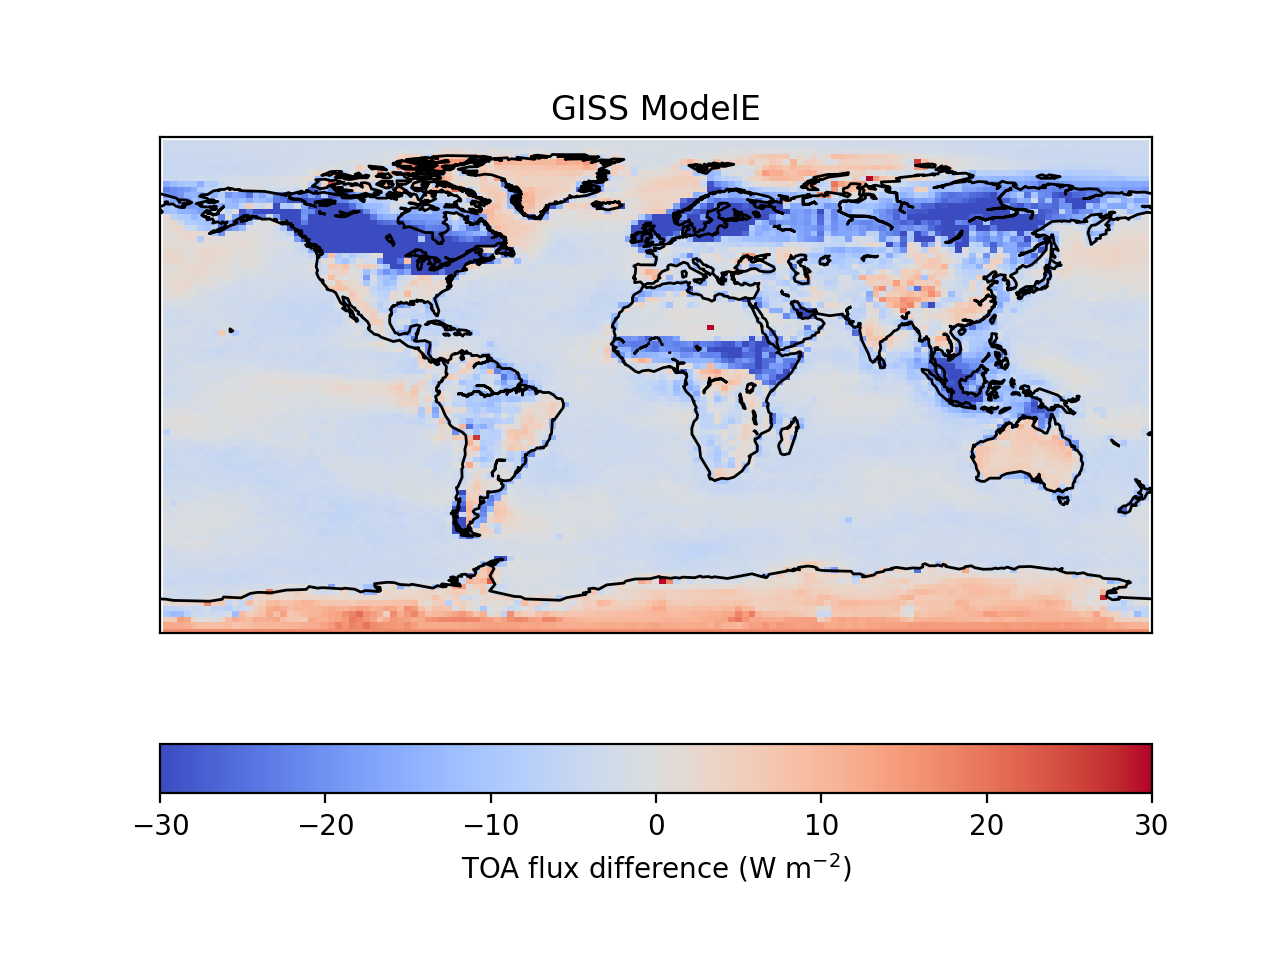

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [49]:
TOA_LGM=netrad_LGM
TOA_pi=netrad_piC
TOA_giss=TOA_LGM-TOA_pi
dT=tsurf_LGM-tsurf_piC
plt.figure()
plt.title("GISS ModelE")
m=bmap(TOA_giss,vmin=-30,vmax=30,projection="cyl")
cbar=plt.colorbar(orientation="horizontal",label=r'TOA flux difference (W m$^{-2}$)')
m.drawcoastlines()
plt.savefig("GISS_TOA_flux.png")

In [ ]:
Fo=cdutil.averager(netrad_LGM,axis='xy')-cdutil.averager(netrad_piC,axis='xy')
To=cdutil.averager(dT,axis='xy')
Fo

In [ ]:
f=cdms.open("/Users/kmarvel/Documents/DATA/LGM/kernels/HadGEM3-GA7.1_TOA_kernel.nc")

tsurf_kernel=f("tsurf_lw")
regridded=MV.zeros((12,)+TOA_giss.getGrid().shape)
for i in range(12):
    regridded[i]=tsurf_kernel[i].regrid(TOA_giss.getGrid(),regridTool='regrid2')
regridded.setAxis(0,tsurf_kernel.getAxis(0))
regridded.setAxis(1,TOA_giss.getGrid().getAxis(0))
regridded.setAxis(2,TOA_giss.getGrid().getAxis(1))
f.close()

In [ ]:
ERF_giss=TOA_giss-MV.average(regridded,axis=0)*dT
plt.figure()
m=bmap(ERF_giss,vmin=-30,vmax=30,projection="cyl")

In [ ]:
cdutil.averager(ERF_giss,axis='xy')

# CESM2

In [ ]:
model="CESM2"
model_lgm_id="CESM"

datadirec="/Users/kmarvel/Documents/DATA/LGM/LGM-Adjustments/"+model_lgm_id+"/"

#datadirec="/Users/kmarvel/Documents/DATA/LGM/LGM-Adjustments/ipsl-ice6g/"

## Top-of-atmosphere variables

f=cdms.open(glob.glob(datadirec+"rsdt_*")[0])

rsdt=f("rsdt")
print(rsdt.attributes)
f.close()

f=cdms.open(glob.glob(datadirec+"rsut_*")[0])

rsut=f("rsut")

f.close()

f=cdms.open(glob.glob(datadirec+"rlut_*")[0])

rlut=f("rlut")

f.close()

TOA = rsdt-(rsut+rlut)

TOA_LGM=MV.average(TOA,axis=0)
print("TOA imbalance is ", MV.average(cdutil.averager(TOA,axis='xy')))

f=cdms.open(glob.glob(datadirec+"ts_*")[0])

ts=f("ts")

f.close()


In [ ]:
print("Global mean upwelling shortwave =",\
      MV.average(cdutil.averager(rsut,axis='xy'),axis=0))

print("Global mean upwelling longwave =",\
      MV.average(cdutil.averager(rlut,axis='xy'),axis=0))

print("Global mean downwelling shortwave =",\
      MV.average(cdutil.averager(rsdt,axis='xy'),axis=0))

going_up=MV.average(cdutil.averager(rlut,axis='xy'),axis=0)+\
MV.average(cdutil.averager(rsut,axis='xy'),axis=0)

rsdt_mean=MV.average(rsdt,axis=0)
going_down=cdutil.averager(rsdt_mean,axis='xy')
print(going_down-going_up)


In [ ]:
model="CESM2"
pidirec="/Users/kmarvel/Documents/DATA/LGM/ProcessedFromMary/"+model+"/piControl/TimeMeans/"

histdirec="/Users/kmarvel/Documents/DATA/LGM/ProcessedFromMary/"+model+"/historical/TimeMeans/"
#Kludge: use rsdt from LGM since it's not available for piControl.  Fix this by using historical
#rsdt_mean=MV.average(rsdt,axis=0)
frsdt= cdms.open(histdirec+"rsdt_timemean.nc")
rsdt_pi=frsdt("rsdt")
if model=="CESM2":
    rsdt_pi=rsdt_pi.regrid(rsdt.getGrid(),regridTool='regrid2')
frsdt.close()

#Upwelling shortwave
frsut=cdms.open(pidirec+"rsut_timemean.nc")
#Need to regrid because LGM runs in CESM were on a 2o grid
rsut_pi=frsut("rsut")
if model=="CESM2":
    rsut_pi=rsut_pi.regrid(rsdt.getGrid(),regridTool='regrid2')

frsut.close()

#Upwelling longwave

frlut=cdms.open(pidirec+"rlut_timemean.nc")
rlut_pi=frlut("rlut")
if model=="CESM2":
    rlut_pi=rlut_pi.regrid(rsdt.getGrid(),regridTool='regrid2')
frlut.close()

#Clear-sky upwelling shortwave
frsutcs=cdms.open(pidirec+"rsutcs_timemean.nc")
rsutcs_pi=frsutcs("rsutcs")
if model=="CESM2":
    rsutcs_pi=rsutcs_pi.regrid(rsdt.getGrid(),regridTool='regrid2')
frsutcs.close()

#Clear-sky upwelling longwave
frlutcs=cdms.open(pidirec+"rlutcs_timemean.nc")
rlutcs_pi=frlutcs("rlutcs")
if model=="CESM2":
    rlutcs_pi=rlutcs_pi.regrid(rsdt.getGrid(),regridTool='regrid2')
frlutcs.close()

#Surface temperature
fts=cdms.open(pidirec+"ts_timemean.nc")
ts_pi=fts("ts")
if model=="CESM2":
    ts_pi=ts_pi.regrid(rsdt.getGrid(),regridTool='regrid2')
fts.close()
TOA_pi=rsdt_pi-(rlut_pi+rsut_pi)

In [ ]:
print("TOA imbalance is", float(cdutil.averager(TOA_pi,axis='xy')), "Wm-2")

In [ ]:
plt.figure()
plt.set_cmap(cm.coolwarm)
m=bmap(TOA_LGM-TOA_pi,projection="cyl",vmin=-40,vmax=40,lon_0=0)
cbar=plt.colorbar(orientation="horizontal")
m.drawcoastlines()

In [ ]:
cdutil.averager(TOA_LGM-TOA_pi,axis='xy')

In [ ]:
F2x=3.7
LewCur=1.6
lam=F2x/LewCur
lam*-5